# Data 다루기

## 실습 데이터: 피마 인디언 당뇨명 예측 (pima-indians-diabetes.csv)

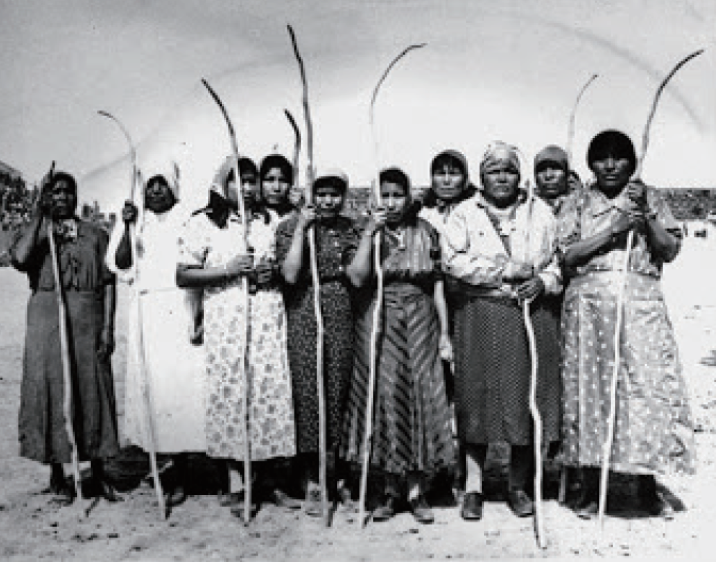


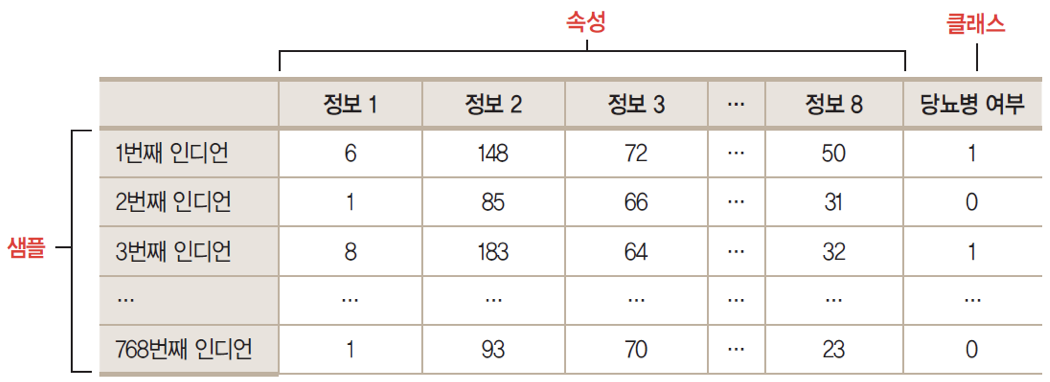



In [1]:
import pandas as pd

df = pd.read_csv('../dataset/pima-indians-diabetes.csv', 
                 names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [2]:
print(df.head(10))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
5         5     116        74          0        0  25.6     0.201   30      0
6         3      78        50         32       88  31.0     0.248   26      1
7        10     115         0          0        0  35.3     0.134   29      0
8         2     197        70         45      543  30.5     0.158   53      1
9         8     125        96          0        0   0.0     0.232   54      1


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.751302   69.105469   20.536458   79.799479   31.992578   
std      3.369578   32.266522   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [5]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [6]:
print(df[['pregnant', 'class']].groupby(['pregnant']).mean().sort_values(by='pregnant', ascending=False))

             class
pregnant          
17        1.000000
15        1.000000
14        1.000000
13        0.500000
12        0.444444
11        0.636364
10        0.416667
9         0.642857
8         0.578947
7         0.555556
6         0.320000
5         0.368421
4         0.338235
3         0.360000
2         0.184466
1         0.214815
0         0.342342


In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
plt.figure(figsize = (12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [9]:
colormap = plt.cm.gist_heat

In [10]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.128075,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.128075,1.000000,0.145942,0.062528,0.331417,0.215896,0.139854,0.262339,0.465583
pressure,0.141282,0.145942,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.062528,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331417,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.215896,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.139854,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.262339,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.465583,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

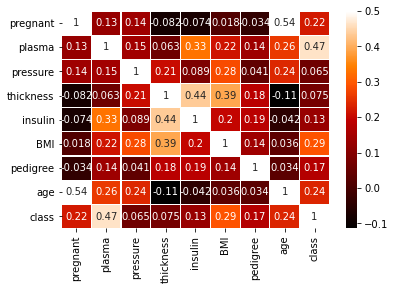

In [11]:
sb.heatmap(df.corr(), linewidths=0.2, vmax=0.5, cmap=colormap, linecolor = 'white', annot=True)

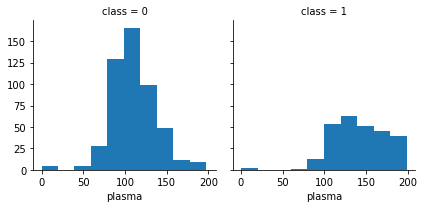

In [12]:
grid = sb.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy
import tensorflow as tf

numpy.random.seed(3)
tf.random.set_seed(3)

dataset = numpy.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation ='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=10)






Epoch 1/200
77/77 [==============================] - 0s 561us/step - loss: 12.0675 - accuracy: 0.6278
Epoch 2/200
77/77 [==============================] - 0s 540us/step - loss: 5.7416 - accuracy: 0.6214
Epoch 3/200
77/77 [==============================] - 0s 598us/step - loss: 3.2823 - accuracy: 0.5397
Epoch 4/200
77/77 [==============================] - 0s 573us/step - loss: 1.6525 - accuracy: 0.5594
Epoch 5/200
77/77 [==============================] - 0s 644us/step - loss: 0.8924 - accuracy: 0.4787
Epoch 6/200
77/77 [==============================] - 0s 608us/step - loss: 0.8668 - accuracy: 0.5281
Epoch 7/200
77/77 [==============================] - 0s 620us/step - loss: 0.7618 - accuracy: 0.6774
Epoch 8/200
77/77 [==============================] - 0s 603us/step - loss: 0.7589 - accuracy: 0.6757
Epoch 9/200
77/77 [==============================] - 0s 601us/step - loss: 0.7125 - accuracy: 0.6563
Epoch 10/200
77/77 [==============================] - 0s 619us/step - loss: 0.6483 - accur

77/77 [==============================] - 0s 507us/step - loss: 0.5032 - accuracy: 0.7456
Epoch 82/200
77/77 [==============================] - 0s 530us/step - loss: 0.5139 - accuracy: 0.7368
Epoch 83/200
77/77 [==============================] - 0s 554us/step - loss: 0.5502 - accuracy: 0.7318
Epoch 84/200
77/77 [==============================] - 0s 576us/step - loss: 0.5097 - accuracy: 0.7237
Epoch 85/200
77/77 [==============================] - 0s 536us/step - loss: 0.4793 - accuracy: 0.7740
Epoch 86/200
77/77 [==============================] - 0s 529us/step - loss: 0.5056 - accuracy: 0.7636
Epoch 87/200
77/77 [==============================] - 0s 506us/step - loss: 0.4992 - accuracy: 0.7401
Epoch 88/200
77/77 [==============================] - 0s 542us/step - loss: 0.4972 - accuracy: 0.7493
Epoch 89/200
77/77 [==============================] - 0s 541us/step - loss: 0.4811 - accuracy: 0.7539
Epoch 90/200
77/77 [==============================] - 0s 510us/step - loss: 0.4865 - accuracy: 

77/77 [==============================] - 0s 511us/step - loss: 0.4614 - accuracy: 0.7913
Epoch 161/200
77/77 [==============================] - 0s 522us/step - loss: 0.4547 - accuracy: 0.7980
Epoch 162/200
77/77 [==============================] - 0s 539us/step - loss: 0.4368 - accuracy: 0.7909
Epoch 163/200
77/77 [==============================] - 0s 531us/step - loss: 0.4754 - accuracy: 0.7603
Epoch 164/200
77/77 [==============================] - 0s 538us/step - loss: 0.4826 - accuracy: 0.7653
Epoch 165/200
77/77 [==============================] - 0s 543us/step - loss: 0.4651 - accuracy: 0.7648
Epoch 166/200
77/77 [==============================] - 0s 530us/step - loss: 0.4550 - accuracy: 0.7768
Epoch 167/200
77/77 [==============================] - 0s 529us/step - loss: 0.4590 - accuracy: 0.7698
Epoch 168/200
77/77 [==============================] - 0s 546us/step - loss: 0.4479 - accuracy: 0.7946
Epoch 169/200
77/77 [==============================] - 0s 521us/step - loss: 0.4452 - a

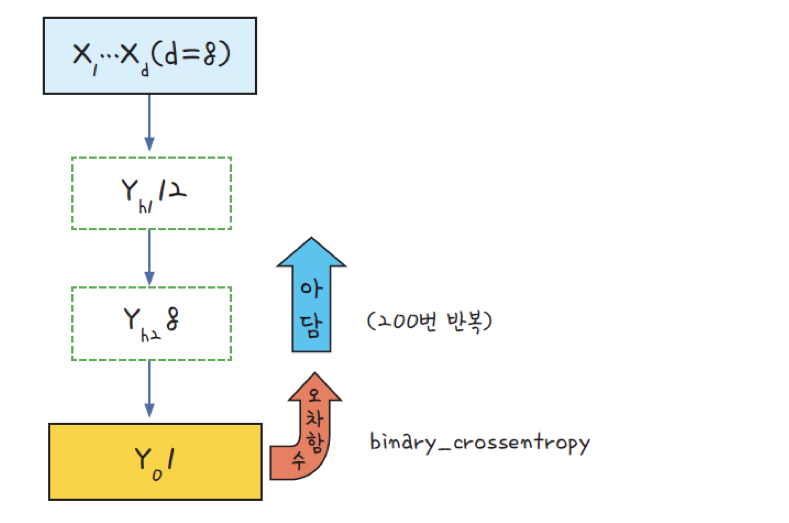